# Proyecto 3: Predicción de precios de propiedades

¡Bienvenidos al tercer proyecto de la carrera de Data Science de Acamica! 

En este proyecto vamos a seguir trabajando con el dataset de propiedades en venta publicadas en el portal [Properati](www.properati.com.ar). El objetivo en este caso armar nuestros primeros modelos para predecir el precio de las propiedades en dólares.

Las columnas que se agregan son:

* `barrios_match`: si coincide el barrio publicado con el geográfico vale 1, si no 0.

* `PH`, `apartment`, `house`: variables binarias que indican el tipo de propiedad.

* dummies de barrios: variables binarias con 1 o 0 según el barrio.

La métrica que vamos a usar para medir es RMSE (raíz del error cuadrático medio), cuya fórmula es:

$$RMSE = \sqrt{\frac{\sum_{t=1}^n (\hat y_t - y_t)^2}{n}}$$

In [1]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df = pd.read_csv('datos_properati_limpios_model.csv')
df.head(10)

,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,rooms,barrio_match,PH,apartment,house,...,VILLA LUGANO,VILLA LURO,VILLA ORTUZAR,VILLA PUEYRREDON,VILLA REAL,VILLA RIACHUELO,VILLA SANTA RITA,VILLA SOLDATI,VILLA URQUIZA,outlier_price_m2
0,-34.589,-58.417,170000.000,40.000,38.000,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,-34.591,-58.418,90000.000,27.000,27.000,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,-34.587,-58.437,150000.000,44.000,44.000,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,-34.593,-58.428,154000.000,58.000,58.000,2,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-34.593,-58.428,154000.000,58.000,58.000,3,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,-34.567,-58.435,65000.000,22.000,20.000,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,-34.586,-58.437,175000.000,62.000,58.000,3,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,-34.583,-58.422,95000.000,32.000,32.000,2,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,-34.576,-58.429,95900.000,77.000,22.000,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,-34.578,-58.413,159000.000,32.000,30.000,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
print("El dataset que vamos a trabajar aquí tiene {} observaciones".format(df.shape[0]))

El dataset que vamos a trabajar aquí tiene 6376 observaciones


El objetivo de este proyecto es poder trabajar en el ajuste de modelos y su posterior evaluación.

Para empezar vamos a separar el `dataset` en un conjunto de entrenamiento (80%) y un conjunto de test (20%). 

**Separá el dataset** en `X_train`, `X_test`, `y_train` e `y_test` con el tamaño correspondiente

In [3]:
X = df.drop(['price_aprox_usd'], axis=1)
y = df['price_aprox_usd']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_test.shape)
print("---------")
print(X_train.shape)

(1276, 58)
---------
(5100, 58)


## Árboles de decisión

Lo primero que vamos a hacer es entrenar un árbol de decisión y usar de métrica al `RMSE`. 

Para poder obtener el **RMSE** vamos a medir el `mean_squared_error` y obtener su raíz cuadrada. 

**Importá** `DecisionTreeRegressor` desde `sklearn.tree`.  

A continuación **entrená** el regresor con el conjunto de training


In [30]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor()
clf.fit(X_train, y_train)
X_train.shape

(5100, 58)

Con el modelo entrenado **realizá la predicción** sobre el conjunto de test `X_test` y guardá el resultado en una variable `y_pred`.

In [5]:
y_pred = clf.predict(X_test)
df_test =pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df_test.sort_index().head()

,Actual,Predicted
8,95900.000,69000.000
14,141713.140,178000.000
15,83500.000,150000.000
17,150000.000,145000.000
19,123000.000,110000.000


**Calculá el rmse** sacando la raíz cuadrada de `mean_squared_error` entre `y_test` e `y_pred` y **mostrá** el resultado

In [6]:
from sklearn import metrics
import numpy as np
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Squared Error: 633741143.2089846
Root Mean Squared Error: 25174.215840994624


__Analizar el cambio en el RMSE a medida que es más profundo el árbol de decisión, tanto en training como en testing.__

Para esto, **iterá** de 5 en 5 en el parámetro `max_depth` y **observá** como impacta en el RMSE. 

**Creá** dos arreglos `rmses_train` y `rmses_test` para ir guardando los **rmse** de cada profundidad

In [7]:
rmses_test = []
for i in range(1,50,5):
    clf = DecisionTreeRegressor(max_depth = i)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    rmses_test.append(rmse_test)
print(rmses_test)

[26295.14025353065, 21908.872820965524, 22230.079296923046, 24401.703789299005, 25295.164586337378, 25358.844245946693, 24828.205306795244, 24823.567059364348, 25165.99597920242, 25109.382060992633]


In [8]:
y_pred_train = clf.predict(X_train)
df_train =pd.DataFrame({'Actual':y_train, 'Predicted':y_pred_train})
df_train.sort_index().head()

,Actual,Predicted
0,170000.000,170000.000
1,90000.000,90000.000
2,150000.000,150000.000
3,154000.000,154000.000
4,154000.000,154000.000


In [9]:
rmses_train = []
for m in range(1,50,5): 
    clf = DecisionTreeRegressor(max_depth = m)
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
    rmses_train.append(rmse_train)
print(rmses_train)

[26884.06654887286, 20287.874363151426, 14100.971579882917, 6386.51360970568, 1936.4194382913533, 569.2369612090697, 526.3339719538154, 526.3339719538154, 526.3339719538154, 526.3339719538154]


Ahora graficamos los valores que guardamos en los arreglos `rmses_train` y `rmses_test`

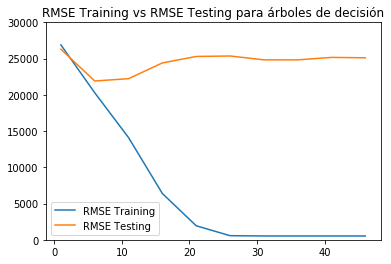

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(range(1,50, 5), rmses_train, label='RMSE Training')
plt.plot(range(1,50, 5), rmses_test, label='RMSE Testing')
plt.ylim((0, 30000))
plt.legend(loc="best")
plt.title("RMSE Training vs RMSE Testing para árboles de decisión")
plt.show()

Podemos ver aquí como el modelo presenta sobreajuste dado que a mayor complejidad (en este caso, mayor profundidad del árbol) más diferencia entre los resultados de training y testing. También observamos como la curva de testing decrece y luego vuelvo a crecer. El punto donde se minimiza está relacionado con el tradeoff entre sesgo y varianza que vamos a ver en la próxima unidad.

## KNN

**Entrená un knn** y nuevamente medir el **rmse** en el conjunto de testing


In [11]:
from sklearn.neighbors import KNeighborsRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train) 
y_train_pred = knn.predict(X_train)
df_train_knn =pd.DataFrame({'Actual':y_train, 'Predicted':y_train_pred})
df_train_knn.sort_index().head()

,Actual,Predicted
0,170000.000,134580.000
1,90000.000,96619.400
2,150000.000,120600.000
3,154000.000,162180.000
4,154000.000,159800.000


In [13]:
y_test_pred = knn.predict(X_test)
df_test_knn =pd.DataFrame({'Actual':y_test, 'Predicted':y_test_pred})
df_test_knn.sort_index().head()

,Actual,Predicted
8,95900.000,69800.000
14,141713.140,139740.000
15,83500.000,110000.000
17,150000.000,141728.000
19,123000.000,127180.000


In [14]:
rmses_train = []
n_neighbors = np.arange(1,30,1)
for i in range (1,30):
    knn = KNeighborsRegressor(i)
    knn.fit(X_train, y_train)
    y_train_pred = knn.predict(X_train)
    rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
    rmses_train.append(rmse_train)
print(rmses_train)

[717.7083160050084, 13746.009016313237, 16557.178260577828, 17829.292761243214, 18751.379229464594, 19293.814806681385, 19794.717263196573, 20139.78742144739, 20468.656317131932, 20701.786822437127, 20912.32302589446, 21139.143085959997, 21272.332798820524, 21364.85500145764, 21441.85527550086, 21573.81242697147, 21670.194530916495, 21772.495151896972, 21860.188681197473, 21967.906130450498, 22062.75264160703, 22142.01003813332, 22232.704205317248, 22302.815306185767, 22392.327817968937, 22470.937588548288, 22526.678661609505, 22566.54520745387, 22623.424659205648]


In [15]:
rmses_test = []
for i in range (1,30,1):
    knn = KNeighborsRegressor(i)
    knn.fit(X_train, y_train)
    y_test_pred = knn.predict(X_test)
    rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
    rmses_test.append(rmse_test)
print(rmses_test)

[26314.375047026846, 24378.43157503682, 23324.776048948213, 23028.274549889524, 22733.040368844526, 22731.27025782464, 22620.31310691122, 22634.689482726375, 22608.863498855015, 22568.211996792175, 22479.91578951748, 22442.04603011599, 22457.046840823732, 22566.696958539993, 22566.465187327743, 22525.328717065153, 22483.195042198382, 22497.920299301164, 22527.948815742915, 22537.14265332446, 22518.04362318813, 22500.339007399805, 22502.879609607357, 22512.658675687984, 22563.793549765833, 22650.77574490309, 22659.512020356644, 22704.298804660535, 22730.289491093965]


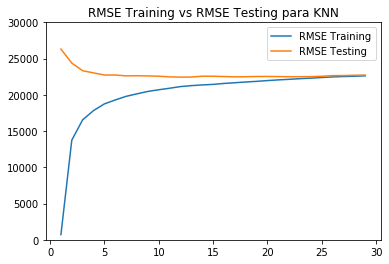

In [16]:
import matplotlib.pyplot as plt
plt.plot(range(1,30, 1), rmses_train, label='RMSE Training')
plt.plot(range(1,30, 1), rmses_test, label='RMSE Testing')
plt.ylim((0, 30000))
plt.legend(loc="best")
plt.title("RMSE Training vs RMSE Testing para KNN")
plt.show()

In [17]:
## Si bien en esta entrega no se pide, a continuación se desarrollará el mismo ejercicio pero con el dataframe estandarizado.
## Hasta donde entiendo, siempre es mejor estandarizar los datos a la hora de utilizar el KNN.

In [18]:
from sklearn.preprocessing import StandardScaler
col_names = df.columns
features = df[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)
df_scaled = scaled_features
df_scaled.head(5)

,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,rooms,barrio_match,PH,apartment,house,...,VILLA LUGANO,VILLA LURO,VILLA ORTUZAR,VILLA PUEYRREDON,VILLA REAL,VILLA RIACHUELO,VILLA SANTA RITA,VILLA SOLDATI,VILLA URQUIZA,outlier_price_m2
0,0.626,0.513,1.565,-0.029,-0.024,-1.397,0.670,-0.323,0.366,-0.156,...,-0.097,-0.111,-0.097,-0.113,-0.059,-0.040,-0.086,-0.031,-0.178,0.000
1,0.543,0.482,-0.988,-0.037,-0.031,-1.397,0.670,-0.323,0.366,-0.156,...,-0.097,-0.111,-0.097,-0.113,-0.059,-0.040,-0.086,-0.031,-0.178,0.000
2,0.734,0.017,0.927,-0.026,-0.020,-1.397,0.670,-0.323,0.366,-0.156,...,-0.097,-0.111,-0.097,-0.113,-0.059,-0.040,-0.086,-0.031,-0.178,0.000
3,0.469,0.231,1.055,-0.017,-0.010,-0.335,0.670,3.100,-2.735,-0.156,...,-0.097,-0.111,-0.097,-0.113,-0.059,-0.040,-0.086,-0.031,-0.178,0.000
4,0.469,0.231,1.055,-0.017,-0.010,0.727,0.670,3.100,-2.735,-0.156,...,-0.097,-0.111,-0.097,-0.113,-0.059,-0.040,-0.086,-0.031,-0.178,0.000


In [19]:
X_scaled = df_scaled.drop(['price_aprox_usd'], axis=1)
y_scaled = df_scaled['price_aprox_usd']
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

In [20]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train) 
y_train_pred = knn.predict(X_train)
df_train_knn =pd.DataFrame({'Actual':y_train, 'Predicted':y_train_pred})
df_train_knn.sort_index().head()

,Actual,Predicted
0,1.565,0.383
1,-0.988,-0.455
2,0.927,1.027
3,1.055,0.522
4,1.055,0.898


In [21]:
y_test_pred = knn.predict(X_test)
df_test_knn =pd.DataFrame({'Actual':y_test, 'Predicted':y_test_pred})
df_test_knn.sort_index().head()

,Actual,Predicted
8,-0.799,0.372
14,0.663,0.702
15,-1.195,0.678
17,0.927,1.648
19,0.065,0.116


__Analizar el cambio en el RMSE a medida que consideramos más vecinos para KNN, tanto en training como en testing.__

Para esto, **iterá** incrementando de a uno el parámetro `n_neighbors` y **observá** como impacta en el RMSE. 

**Creá** dos arreglos `rmses_train` y `rmses_test` para ir guardando los **rmse** de cada profundidad

In [22]:
rmses_train = []
n_neighbors = np.arange(1,30,1)
for i in range (1,30):
    knn = KNeighborsRegressor(i)
    knn.fit(X_train, y_train)
    y_train_pred = knn.predict(X_train)
    rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
    rmses_train.append(rmse_train)
print(rmses_train)

[0.022904816273646718, 0.5339322814450082, 0.6385527033658973, 0.6969004533355867, 0.7328548242002446, 0.7541194097751339, 0.766271253462382, 0.7786192131333951, 0.7904435922203041, 0.7981368250476337, 0.805213786470276, 0.8134911791357916, 0.8174867277879159, 0.8243872821131772, 0.8296322650584387, 0.8336838386892667, 0.8362608613503211, 0.8375939045920694, 0.8406856150499805, 0.8446035178619268, 0.8478576026987815, 0.8499921911237017, 0.8521829825189929, 0.85400370743879, 0.8565898455419387, 0.8593486335205746, 0.8607782441537339, 0.8630085394929987, 0.8647458417731206]


In [23]:
rmses_test = []
for i in range (1,30,1):
    knn = KNeighborsRegressor(i)
    knn.fit(X_train, y_train)
    y_test_pred = knn.predict(X_test)
    rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
    rmses_test.append(rmse_test)
print(rmses_test)

[1.0550307510211625, 0.9558274374911638, 0.9346222708406742, 0.9218406840337906, 0.9122065579434581, 0.907499796832721, 0.9051352367309797, 0.8998532662496732, 0.8974862737112008, 0.894398159327077, 0.8916932257799159, 0.8925124540721368, 0.8913993470984672, 0.8914079493959182, 0.8922664010590589, 0.8938060666957764, 0.8918112362328953, 0.8923484387475107, 0.8933816022368941, 0.8951890663851807, 0.8944833628813306, 0.8965487025884141, 0.8979725091660685, 0.9002218940984537, 0.9014079939740123, 0.9047193100835632, 0.9056486864683508, 0.9057848101232667, 0.9071059498630817]


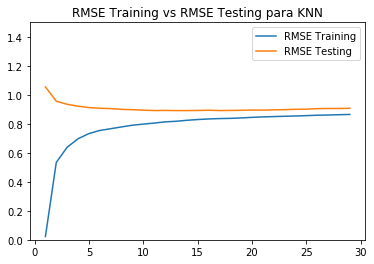

In [24]:
import matplotlib.pyplot as plt
plt.plot(range(1,30, 1), rmses_train, label='RMSE Training')
plt.plot(range(1,30, 1), rmses_test, label='RMSE Testing')
plt.ylim((0, 1.5))
plt.legend(loc="best")
plt.title("RMSE Training vs RMSE Testing para KNN")
plt.show()

**Calcular el RMSE promedio del resultado de cross validation para un árbol de decisión. 
Como parámetros deberás usar:**
- 10 folds
- profundidad 5
- scoring neg_mean_squared_error.

El árbol de decisión guardalo en una variable llamada `regressor` para poder reutilizarla luego.

Atención: `cross_validation_score` de `scikit-learn` usá la métrica `neg_mean_squared_error` (NMSE) en vez de `mean_square_error` (MSE). 

`NMSE` es lo mismo que `MSE` pero con un signo negativo. 

Como nosotros queremos obtener el `MSE` para calcular sobre él el `RMSE`, vamos a definir un método `nmsq2rmse` para hacer esa conversión de `NMSE` a `MSE`
.

In [25]:
def nmsq2rmse(score):
    return np.sqrt(-score)

In [26]:
from sklearn.model_selection import cross_val_score
X = df.drop(['price_aprox_usd'], axis=1)
y = df['price_aprox_usd']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
regressor = DecisionTreeRegressor(max_depth = 5)
regressor.fit(X_train, y_train)
score = cross_val_score(regressor, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
score = nmsq2rmse(score)
score

array([21339.61156931, 21160.1130315 , 23101.30645197, 21573.98699767,
       22617.76339868, 23120.38568626, 21706.71400993, 21951.1392186 ,
       21191.06057582, 22360.03707658])

Para ver el resultado final, reentrenamos al regresor y mostramos en un dataframe la comparación entre los valores reales, los predichos y su diferencia

In [27]:
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
val_real = pd.Series(y_test.values)
val_pred = pd.Series(y_pred)

In [28]:
predicciones = pd.concat([val_real.rename('Valor real'),val_pred.rename('Valor Pred') ,abs(val_real-val_pred).rename('Dif(+/-)')] ,  axis=1)

In [29]:
predicciones.head(10)

,Valor real,Valor Pred,Dif(+/-)
0,80000.000,108426.872,28426.872
1,128000.000,151372.531,23372.531
2,150000.000,151372.531,1372.531
3,85000.000,99219.122,14219.122
4,135000.000,130337.039,4662.961
5,135000.000,119967.914,15032.086
6,68000.000,87243.666,19243.666
7,110000.000,128379.238,18379.238
8,134000.000,154167.172,20167.172
9,110000.000,85248.777,24751.223
